##**CNN CON DATASET CIFAR 10 (DATOS CATEGÓRICOS)**

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Nuclio/DL/Clases/' # Ajustar el directorio raíz de Google Drive

Mounted at /content/drive/


#### **- Cargando el conjunto de datos**

In [2]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [4]:
print(trainY[0])

[6]


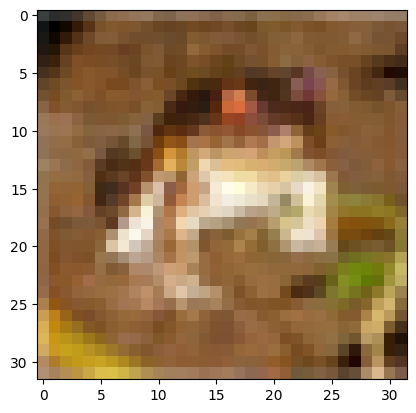

In [7]:
plt.imshow(trainX[0])

#### **- Inspeccionando el conjunto de datos**

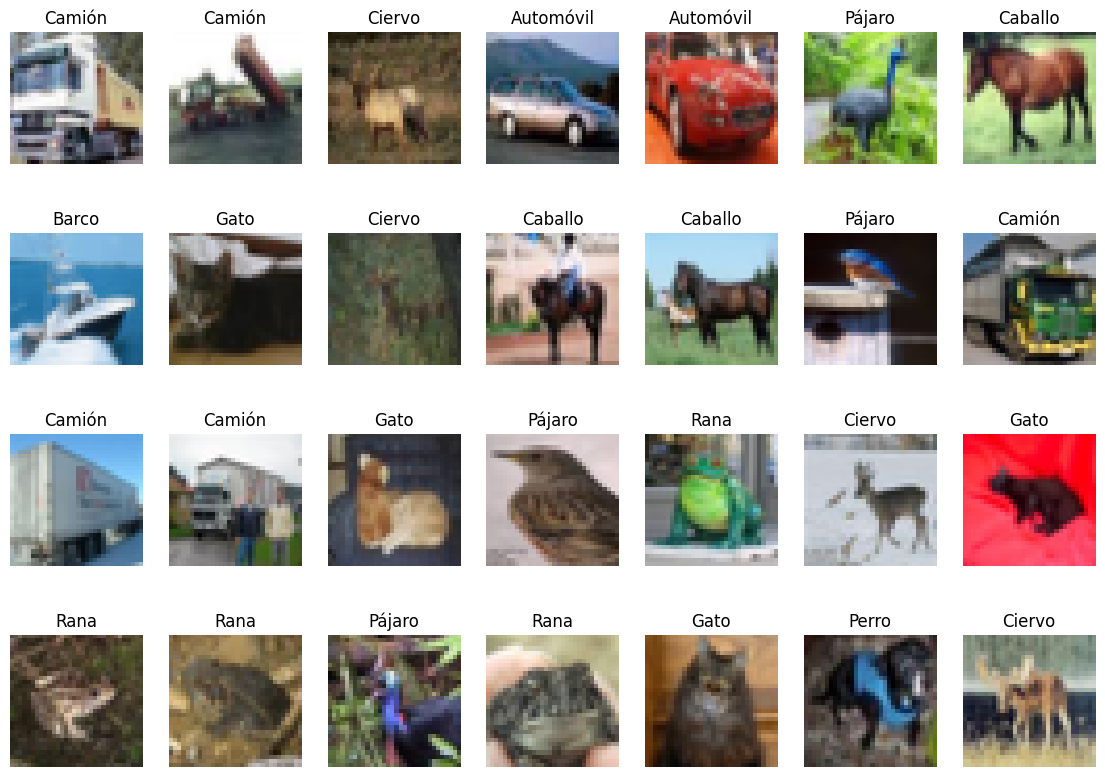

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

#### **- Acondicionando el conjunto de datos**

In [8]:
# PREPROCESAMIENTO DE LOS DATOS
trainX = trainX / 255.0
testX = testX / 255.0

# Por si es necesario convertir a one-hot encoding
# lb = LabelBinarizer()
# trainY = lb.fit_transform(trainY)
# testY = lb.transform(testY)

#### **- Creando la topología de red neuronal y entrenándola: MLP**


[INFO]: Entrenando red neuronal...
Epoch 1/50


1250/1250 [==============================] - 14s 10ms/step - loss: 1.9121 - accuracy: 0.3089 - val_loss: 1.8086 - val_accuracy: 0.3438
Epoch 2/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6807 - accuracy: 0.4008 - val_loss: 1.6372 - val_accuracy: 0.4208
Epoch 3/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5875 - accuracy: 0.4340 - val_loss: 1.5868 - val_accuracy: 0.4291
Epoch 4/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5218 - accuracy: 0.4583 - val_loss: 1.5338 - val_accuracy: 0.4520
Epoch 5/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4675 - accuracy: 0.4752 - val_loss: 1.5642 - val_accuracy: 0.4430
Epoch 6/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4227 - accuracy: 0.4933 - val_loss: 1.4860 - val_accuracy: 0.4728
Epoch 7/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3786 -

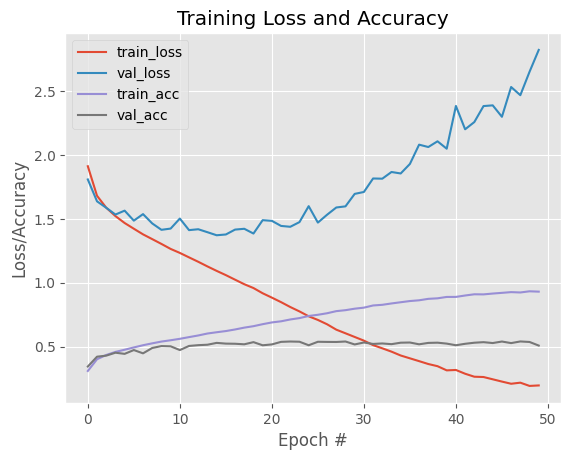

In [9]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential()

model.add(Flatten())
model.add(Dense(2048, input_shape=(3072,), activation="relu")) # input_shape = 32 x 32 x 3
#model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal
# model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en one hot encoding

# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")

# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32)

# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas one hot encoding

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [11]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
#from google.colab import drive

''' 
En esta API realmente estamos usando la API funcional, pero la estamos usando como 
API sequencial, por que la salida de una capa es la entrada de otra
enfoque feed-fordward conection


Podriamos a cualquier entrada definir por ejemplo que entre x1+x2 o que se hagan saltos, o 
retroalimentaciones

Por cada capa le metemos más capas 32 , 64 , 265. Con esto metemos más mapas de características
con cada vez cuadros mas pequeños. 
Esta estructura funciona
'''


# Definimos entradas
# Imputamos la dimensionalidad de la entrada
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])) # shape=(32,32,3)

# BASE MODEL
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #aquí le decimos los datos de entrada que será
# x1 es la salida, y además la entrada, reescribimos
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_cnn = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
313/313 [==============================] - 48s 147ms/step - loss: 1.6486 - accuracy: 0.4524 - val_loss: 2.7774 - val_accuracy: 0.2073
Epoch 2/50
313/313 [==============================] - 53s 169ms/step - loss: 1.0691 - accuracy: 0.6259 - val_loss: 0.9262 - val_accuracy: 0.6727
Epoch 3/50
313/313 [==============================] - 52s 167ms/step - loss: 0.8485 - accuracy: 0.6999 - val_loss: 0.8197 - val_accuracy: 0.7149
Epoch 4/50
313/313 [==============================] - 52s 165ms/step - loss: 0.7285 - accuracy: 0.7412 - val_loss: 0.7506 - val_accuracy: 0.7421
Epoch 5/50
313/313 [==============================] - 52s 166ms/step - loss: 0.6533 - accuracy: 0.7715 - val_loss: 0.8571 - val_accuracy: 0.7188
Epoch 6/50
313/313 [==============================] - 52s 166ms/step - loss: 0.5747 - accuracy: 0.7984 - val_loss: 0.7045 - val_accuracy: 0.7632
Epoch 7/50
313/313 [==============================] - 52s 166ms/step

NameError: name 'drive' is not defined

##**CNN CON DATASET CIFAR 10 (DATOS ONE-HOT-ENCODING)**

#### **- Cargando el conjunto de datos**

In [ ]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

[INFO]: Loading CIFAR-10 data...


#### **- Acondicionando el conjunto de datos**

In [ ]:
# PREPROCESADO DE LOS DATOS
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainY.shape)

# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY.shape)

(50000, 1)
(50000, 10)


#### **- Creando la topología de red neuronal y entrenándola: CNN**

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
313/313 [==============================] - 13s 30ms/step - loss: 2.1711 - accuracy: 0.3428 - val_loss: 3.2245 - val_accuracy: 0.1186
Epoch 2/50
313/313 [==============================] - 8s 26ms/step - loss: 1.5685 - accuracy: 0.4666 - val_loss: 1.4724 - val_accuracy: 0.5023
Epoch 3/50
313/313 [==============================] - 8s 27ms/step - loss: 1.3586 - accuracy: 0.5236 - val_loss: 1.2419 - val_accuracy: 0.5600
Epoch 4/50
313/313 [==============================] - 8s 26ms/step - loss: 1.2086 - accuracy: 0.5683 - val_loss: 1.1642 - val_accuracy: 0.5864
Epoch 5/50
313/313 [==============================] - 8s 26ms/step - loss: 1.1212 - accuracy: 0.6004 - val_loss: 1.0203 - val_accuracy: 0.6426
Epoch 6/50
313/313 [==============================] - 9s 29ms/step - loss: 1.0535 - accuracy: 0.6242 - val_loss: 1.0761 - val_accuracy: 0.6250
Epoch 7/50
313/313 [==============================] - 8s 26ms/step - loss: 1.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       Avión       0.91      0.67      0.77      1000
   Automóvil       0.92      0.90      0.91      1000
      Pájaro       0.76      0.72      0.74      1000
        Gato       0.64      0.64      0.64      1000
      Ciervo       0.72      0.84      0.78      1000
       Perro       0.81      0.62      0.70      1000
        Rana       0.74      0.93      0.83      1000
     Caballo       0.83      0.84      0.83      1000
       Barco       0.82      0.93      0.87      1000
      Camión       0.89      0.89      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



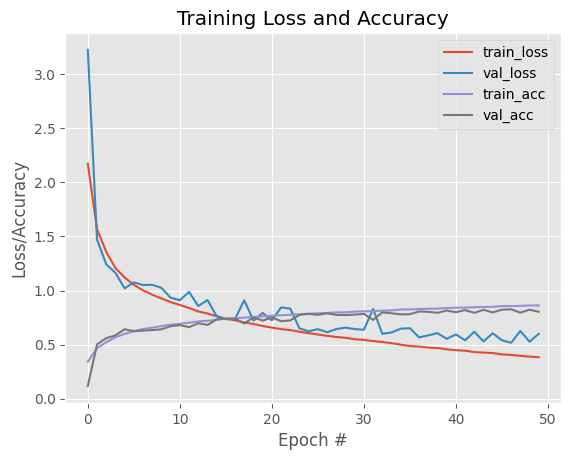

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# BASE MODEL
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal
model_cnn.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas one hot encoding

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128)

# Sacamos el report para test
# print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas one hot encoding

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()